<a href="https://colab.research.google.com/github/danielguinon/03MAIR---Algoritmos-de-Optimizacion---2019/blob/master/AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programación dinámica, ramificación/poda y descenso del gradiente

### Problema del viaje por el río

In [2]:
import numpy as np

def Precios(tarifas):
    N = len(tarifas)
    precios = [[9999]*N for i in [9999]*N]
    ruta = [[""]*N for i in [""]*N]
    for i in range(N-1):
        for j in range(i+1, N):
            minimo = tarifas[i][j]
            ruta[i][j] = i
            for k in range(i, j):
                if precios[i][k] + tarifas[k][j] < minimo:
                    minimo = min(minimo, precios[i][k] + tarifas[k][j])
                    ruta[i][j] = k
                precios[i][j] = minimo
    return precios,ruta

tarifa = [
    [0,5,4,3,999,999,999],
    [999,0,999,2,3,999,11],
    [999,999,0,1,999,4,10],
    [999,999,999,0,5,6,9],
    [999,999,999,999,0,999,4],
    [999,999,999,999,999,0,3],
    [999,999,999,999,999,999,0]
]
precios, ruta = Precios(tarifa)
print(precios)
print(ruta)

[[9999, 5, 4, 3, 8, 8, 11], [9999, 9999, 999, 2, 3, 8, 7], [9999, 9999, 9999, 1, 6, 4, 7], [9999, 9999, 9999, 9999, 5, 6, 9], [9999, 9999, 9999, 9999, 9999, 999, 4], [9999, 9999, 9999, 9999, 9999, 9999, 3], [9999, 9999, 9999, 9999, 9999, 9999, 9999]]
[['', 0, 0, 0, 1, 2, 5], ['', '', 1, 1, 1, 3, 4], ['', '', '', 2, 3, 2, 5], ['', '', '', '', 3, 3, 3], ['', '', '', '', '', 4, 4], ['', '', '', '', '', '', 5], ['', '', '', '', '', '', '']]


In [3]:
def calcular_ruta(ruta, desde, hasta):
    if desde == hasta:
        return desde
    else:
        return str(calcular_ruta(ruta, desde, ruta[desde][hasta]))+','+str(ruta[desde][hasta])

print("\nLa ruta es:")
calcular_ruta(ruta, 0, 6)


La ruta es:


'0,0,2,5'

## Ramificación y poda

Función objetivo:

In [4]:
costes = [
    [11,12,18,40],
    [14,15,13,22],
    [11,17,19,23],
    [17,14,20,28]
]

def valor(s, costes):
    val = 0
    for i in range(len(s)):
        val += costes[s[i]][i]
    return val
valor((0,1,2,3), costes)

73

### Algoritmo de fuerza bruta


In [10]:
import itertools
import signal

def fuerza_bruta(costes):
    mejor_valor = 10e10
    mejor_solucion = ()
    for s in list(itertools.permutations(range(len(costes)))):
        valor_tmp = valor(s, costes)
        if valor_tmp < mejor_valor:
            mejor_valor = valor_tmp
            mejor_solucion = s
    print("La mejor solucion es:", mejor_solucion, "con valor:", mejor_valor)
    
costes = [
    [11,12,18,40],
    [14,15,13,22],
    [11,17,19,23],
    [17,14,20,28]
]

fuerza_bruta(costes)

costes2 = np.random.randint(10, size=(12,12))

# fuerza_bruta(costes2)


La mejor solucion es: (0, 3, 1, 2) con valor: 61


La complejidad del algoritmo de fuerza bruta es $o(n!)$, puesto que es una permutación de las n tareas. Con n > 11 el tiempo se vuelve inaceptable.

### Algoritmo con programación dinámica

In [14]:
def CI(s, costes):
    valor = 0
    for i in range(len(s)):
        valor += costes[i][s[i]]
        
    for i in range(len(costes)):
        if i not in s:
            valor += min([costes[j][i] for j in range(len(s), len(costes))])
    return valor

def crear_hijos(nodo, n):
    hijos = []
    for i in range(n):
        if i not in nodo:
            hijos.append({'s': nodo +(i,)})
    return hijos

def ramificacion_y_poda(costes):
    dimension = len(costes)
    mejor_solucion = tuple(i for i in range(len(costes)))
    CotaSup = valor(mejor_solucion, costes)
    
    nodos = []
    nodos.append({'s':(), 'ci': CI((),costes)})
    
    iteracion = 0
    
    while(len(nodos) > 0):
        iteracion += 1
        nodo_prometedor = [min(nodos, key = lambda x:x['ci'])][0]['s']
        hijos = [{'s':x['s'], 'ci':CI(x['s'], 
                  costes)} for x in crear_hijos(nodo_prometedor, dimension)]
        nodo_final = [x for x in hijos if len(x['s']) == dimension]
        if len(nodo_final) > 0:
            if nodo_final[0]['ci'] < CotaSup:
                CotaSup = nodo_final[0]['ci']
                mejor_solucion = nodo_final
        hijos = [x for x in hijos if x['ci'] < CotaSup]
        nodos.extend(hijos)
        nodos = [x for x in nodos if x['s'] != nodo_prometedor]
    print("La solucion final es:" , mejor_solucion, "en", iteracion,
          "iteraciones", "para dimension:", dimension)

ramificacion_y_poda(costes)

costes2 = np.random.randint(10, size=(16,16))

# ramificacion_y_poda(costes2)

La solucion final es: [{'s': (0, 2, 3, 1), 'ci': 61}] en 14 iteraciones para dimension: 4


Con el algoritmo de ramificación y poda, el límite de lo aceptable se extiende hasta 16.

## Descenso del gradiente

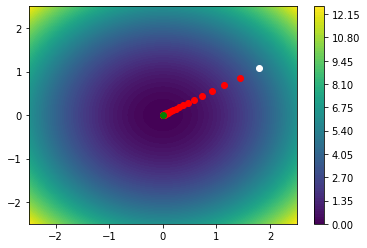

Solucion: [6.301375642505974e-49, 3.766302216546486e-49] 5.389236737433054e-97


array([0., 0.])

In [17]:
import math
import matplotlib.pyplot as plt
import numpy as np 
import random

# funcion a minimizar
f = lambda X: X[0]**2+X[1]**2
df = lambda X: [2*X[0], 2*X[1]]

resolucion = 100
rango = 2.5 
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))
for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[iy, ix] = f([x,y])
plt.contourf(X, Y, Z, resolucion)
plt.colorbar()

P = [random.uniform(-2,2), random.uniform(-2, 2)]
plt.plot(P[0], P[1], "o", c= "white")

# tasa de aprendizaje
TA = .1

for _ in range(500):
    grad = df(P)
    P[0], P[1] = P[0] - TA*grad[0], P[1] - TA*grad[1]
    plt.plot(P[0], P[1], "o", c = "red")

plt.plot(P[0], P[1], "o", c = "green")
plt.show()
print("Solucion:", P, f(P))

f = lambda X: np.sin(1/2 * X[0] ** 2 -1/4 * X[1]**2 + 3) * np.cos(2*X[0] +1 - np.e**X[1])

def df(punto):
    h = 0.01
    T = np.copy(punto)
    grad = np.zeros(2)
    for it, th in enumerate(punto):
        T[it] = T[it] + h
        grad[it] = (f(T) - f(punto))/h
    return grad

df([7,6])